In [ ]:
pip install -U scikit-learn
pip install mglearn

In [1]:
"""Make Simulation"""
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, n_repeated=0, n_classes=3,
                          n_clusters_per_class=2,class_sep=2,flip_y=0,weights=[0.96,0.035,0.005], random_state=16)  

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [4]:
import GA
import SAMMEC2

In [6]:
GA.GA_SAMMEC2(n_class=3,
                err=0.01,
                size=2,
                generations=2,
                n_estimators=200,
                random_state=50).fit(X_train,y_train,X_test,y_test)

 GENERATION 1
([0.9817710223373315, 0.9874902740406701, 0.999], 0.6122919297246335) 0.9852
([0.916683864575793, 0.9510321758056884, 0.999], 0.8195769012506975) 0.7148
 GENERATION 2
([0.9567879683120735, 0.9776895163432805, 0.999], 0.7959024621960712) 0.9668
([0.91271482134894, 0.9482104568140991, 0.999], 0.801891058432489) 0.7088

🔬 FINAL RESULT
[0.916683864575793, 0.9510321758056884, 0.999] (0.8195769012506975, 0.7148)


In [8]:
SAMMEC2 = SAMMEC2.AdaBoostClassifier_C2V2(n_estimators=200, 
                                            random_state=50,
                                            cost=[0.916683864575793, 0.9510321758056884, 0.999])

SAMMEC2.fit(X_train, y_train)
y_pred_SAMME=SAMMEC2.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83      2388
           1       0.31      0.84      0.46        98
           2       0.02      0.93      0.05        14

    accuracy                           0.71      2500
   macro avg       0.45      0.82      0.44      2500
weighted avg       0.97      0.71      0.81      2500

G_Mean 0.8195769012506975
F1_Measure: 0.04651162790697675
Accuracy: 0.7148


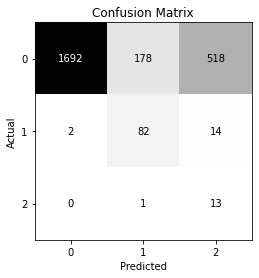

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score
import mglearn
import matplotlib.pyplot as plt
#Classification_report
print("Classification Report:\n",classification_report(y_test, y_pred_SAMME))
print("G_Mean", geometric_mean_score(y_test, y_pred_SAMME,correction=0.0001))
print("F1_Measure:", f1_score(y_test, y_pred_SAMME, average=None)[2])
print("Accuracy:", accuracy_score(y_test, y_pred_SAMME))

mglearn.tools.heatmap(confusion_matrix(y_test, y_pred_SAMME), xlabel='Predicted',ylabel="Actual",
                      xticklabels=["0","1","2"], yticklabels=["0","1","2"], cmap=plt.cm.gray_r,fmt="%d")
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()